# Scaling with PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data
X_train = pd.read_csv(filepath_or_buffer='x_train.csv')
print(X_train.shape)
X_train.head()

(8760227, 18)


,VendorID,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekday,minute_of_the_day,lat_diff,lon_diff,angle,dist_l1,dist_l2,hav_dist,daily_count,hourly_count,hav_time
0,0,1,0,-73.980324,40.716831,-73.968712,40.682079,4,446,-0.034752,0.0,-90.0,0.046364,0.036641,3.986301,318228,378221,10.677972
1,1,1,0,-73.983238,40.730484,-73.938957,40.789139,0,1341,0.058655,0.0,90.0,0.102936,0.073493,7.513174,271348,528362,18.160424
2,1,1,0,-73.994598,40.749249,-73.982941,40.731350,5,80,-0.017899,0.0,-90.0,0.029556,0.021360,2.219383,357494,235737,4.960287
3,0,2,0,-73.974083,40.784019,-73.969353,40.758419,5,1057,-0.025600,0.0,-90.0,0.030331,0.026034,2.874377,357494,526389,8.506661
4,0,1,0,-73.979378,40.747108,-73.998161,40.756630,2,1319,0.009521,0.0,90.0,0.028305,0.021059,1.903788,307732,572724,4.773356


In [3]:
# Reading target
y_train = pd.read_csv(filepath_or_buffer='y_train.csv')
print(y_train.shape)
y_train.head()

(8760227, 1)


,trip_duration
0,6.943122
1,6.874198
2,6.444131
3,6.672033
4,6.135565


In [4]:
# Reading testing data
X_test = pd.read_csv(filepath_or_buffer='x_test.csv')
print(X_test.shape)
X_test.head()

(973359, 18)


,VendorID,passenger_count,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekday,minute_of_the_day,lat_diff,lon_diff,angle,dist_l1,dist_l2,hav_dist,daily_count,hourly_count,hav_time
0,1,1,0,-73.955841,40.773731,-73.955795,40.763897,1,550,-0.009834,0.0,-90.0,0.009880,0.009834,1.093531,291658,469272,3.285720
1,1,1,0,-73.961533,40.764442,-73.982895,40.764931,3,1173,0.000488,0.0,90.0,0.021851,0.021368,1.799929,315984,635379,5.090298
2,0,2,0,-73.987617,40.721180,-73.922096,40.763649,5,1368,0.042469,0.0,90.0,0.107990,0.078081,7.264343,357494,528362,17.558962
3,1,1,0,-73.990616,40.756149,-73.981659,40.758816,4,360,0.002666,0.0,90.0,0.011623,0.009345,0.810596,349840,210187,2.032025
4,1,1,0,-73.961426,40.768909,-73.954315,40.778622,5,953,0.009712,0.0,90.0,0.016823,0.012037,1.234833,358064,476785,3.750373


In [5]:
# Reading testing target
y_test = pd.read_csv(filepath_or_buffer='y_test.csv')
print(y_test.shape)
y_test.head()

(973359, 1)


,trip_duration
0,5.891644
1,6.929517
2,7.252762
3,5.484797
4,4.969813


In [6]:
# Scaling X
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.transform(X_test)

In [7]:
pca = PCA().fit(X_train_pca)

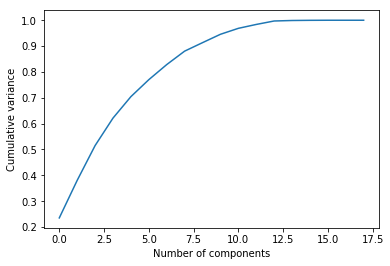

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance")
plt.show()

In [9]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [10]:
list(zip(range(1,len(arr)), arr))

[(1, 23.53),
 (2, 38.06),
 (3, 51.52),
 (4, 62.150000000000006),
 (5, 70.45),
 (6, 77.01),
 (7, 82.85000000000001),
 (8, 88.05000000000001),
 (9, 91.33000000000001),
 (10, 94.56000000000002),
 (11, 96.86000000000001),
 (12, 98.37000000000002),
 (13, 99.71000000000002),
 (14, 99.90000000000002),
 (15, 99.97000000000001),
 (16, 100.00000000000001),
 (17, 100.00000000000001)]

We can tell from output above, 10 features give us 91% varience, so we decided to eliminate other features.

In [11]:
pca_10 = PCA(n_components=10)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

In [12]:
pd.DataFrame(X_train_pca).to_csv('x_train_pca.csv', index=False, header=False)
pd.DataFrame(X_test_pca).to_csv('x_test_pca.csv', index=False, header=False)